In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [146]:
df=pd.read_csv('/kaggle/input/ba-data/customer_booking.csv',encoding='ISO-8859-1')

In [147]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [148]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [150]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [151]:
df.shape

(50000, 14)

In [152]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [153]:
df.duplicated().sum()

719

In [154]:
df=df.drop_duplicates()

In [155]:
df.duplicated().sum()

0

In [156]:
df['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [157]:
df.shape

(49281, 14)

In [158]:
features = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'] 

In [159]:
X=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [160]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [161]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [162]:
selector = SelectKBest(chi2, k=7)
selector.fit(X,y)

SelectKBest(k=7, score_func=<function chi2 at 0x7b69fe5c0040>)

In [163]:
selected_features = X.columns[selector.get_support()]
selected_features

Index(['purchase_lead', 'length_of_stay', 'route', 'booking_origin',
       'wants_extra_baggage', 'wants_preferred_seat', 'flight_duration'],
      dtype='object')

In [164]:
X_selected=X[['purchase_lead', 'length_of_stay', 'route', 'booking_origin',
       'wants_extra_baggage', 'wants_preferred_seat', 'flight_duration']]

In [169]:
Xs_train,Xs_test,ys_train,ys_test=train_test_split(X_selected,y,test_size=0.25)

In [170]:
print(Xs_train.shape)
print(Xs_test.shape)

(36960, 7)
(12321, 7)


In [185]:
#randomforestclassifer with selected features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rs = RandomForestClassifier(n_estimators=100)
model_rs.fit(Xs_train, ys_train)
ys_pred = model_rs.predict(Xs_test)
accuracy = accuracy_score(ys_test,ys_pred)
print(accuracy)

0.8365392419446473


In [186]:
#randomforestclassifer with all features
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

model_r = RandomForestClassifier(n_estimators=100)
model_r.fit(X_train, y_train)
y_pred = model_r.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8512296079863647


In [187]:
#xgboost with selected features
"""import xgboost as xgb

dtrain = xgb.DMatrix(Xs_train,ys_train)
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
}
model_xs = xgb.train(params, dtrain)
ys_pred = model_xs.predict(xgb.DMatrix(Xs_test))
ys_pred = np.round(ys_pred)
accuracy = accuracy_score(ys_test, ys_pred)
print(accuracy)
"""

0.8532586640694749


In [188]:
#xgboost with all features
"""dtrain = xgb.DMatrix(X_train,y_train)
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
}
model_x = xgb.train(params, dtrain)
y_pred = model_x.predict(xgb.DMatrix(X_test))
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
"""

0.852284717149582


In [190]:
from sklearn.model_selection import cross_val_score
scores_rs = cross_val_score(model_rs, X_train, y_train, cv=10)
print("Accuracy for RandomForestClassifier with Selected Features with Cross Validation:", scores_rs.mean())
scores_r = cross_val_score(model_r, X_train, y_train, cv=10)
print("Accuracy for RandomForestClassifier with All Features with Cross Validation:", scores_r.mean())

Accuracy for RandomForestClassifier with Selected Features with Cross Validation: 0.8478354978354978
Accuracy for RandomForestClassifier with All Features with Cross Validation: 0.8483225108225108


<AxesSubplot: xlabel='Feature'>

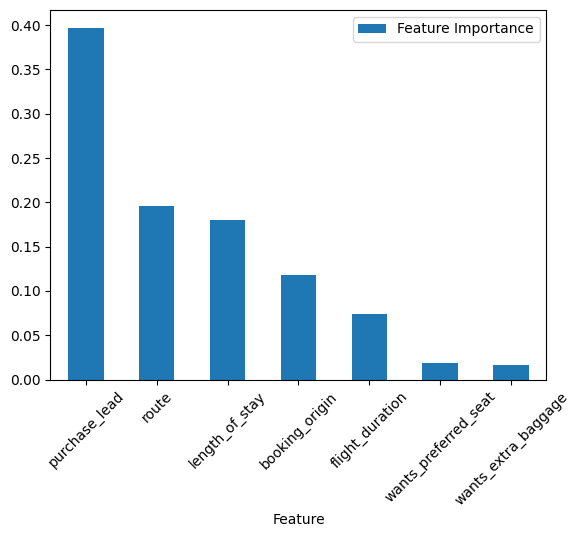

In [203]:
feature_importances = model_rs.feature_importances_
df = pd.DataFrame(feature_importances, columns=["Feature Importance"])
df["Feature"] = Xs_train.columns
df = df.sort_values("Feature Importance", ascending=False)

# Plot the visualization
df.plot(kind="bar", x="Feature", y="Feature Importance", rot=45)


<AxesSubplot: xlabel='Feature'>

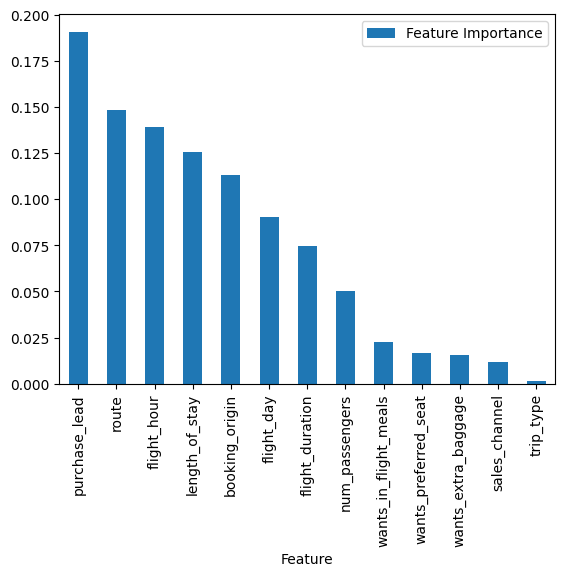

In [202]:
feature_importances = model_r.feature_importances_
df = pd.DataFrame(feature_importances, columns=["Feature Importance"])
df["Feature"] = X_train.columns
df = df.sort_values("Feature Importance", ascending=False)

# Plot the visualization
df.plot(kind="bar", x="Feature", y="Feature Importance", rot=90)